In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import random
import seaborn as sns
sns.set()

In [2]:
# Lectura de los datos
loc=r"winequality-red.csv"
data= pd.read_csv(loc,sep=";",)
names=list(data.columns.values)
label=list(data["quality"])
xlist=(data.drop("quality",1))
xlist=[xlist.iloc[i] for i in range(len(xlist))]

In [3]:
nrows = len(xlist)
ncols = len(xlist[0])

# Tomando un conjunto fijo de prueba del 30%
np.random.seed(1)
nSample = int(nrows*0.3)
idxTest = random.sample(range(nrows),nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nrows) if not (idx in idxTest)]

xTrain = [xlist[r] for r in idxTrain]
xTest = [xlist[r] for r in idxTest]
yTrain = [label[r] for r in idxTrain]
yTest = [label[r] for r in idxTest]


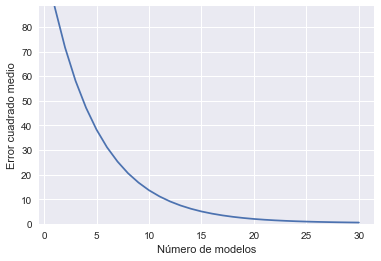

Mínimo MSE: 0.5086


In [4]:
numTreeMax = 30
treeDepth = 5
modelList = []
predList = []
eps = 0.1
residuals = list(yTrain)

for iTrees in range(numTreeMax):
    
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain,residuals)
    
        # Hacer pronóstico con el último modelo y añadirlo a la lista de predicciones
    latestInSamplePrediction = modelList[-1].predict(xTrain)
    
    # Usar la última predicción para actualizar residuales
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]
    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))
    
# construir la predicción acumulada para los primeros n modelos
mse = []
allPredictions = []
for iModels in range(len(modelList)):
    # agregar los primero iModelos y multiplicar por eps
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range (iModels + 1)])*eps)
        
    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors])/len(yTest))
    
nModels = [i + 1 for i in range(len(modelList))]

plt.plot(nModels,mse)
plt.axis("tight")
plt.xlabel("Número de modelos")
plt.ylabel("Error cuadrado medio")
plt.ylim((0.0, max(mse)))
plt.show()

print("Mínimo MSE: %.4f" %(min(mse)))